# Statistical Analysis of AI vs Curator Museum Descriptions

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

# Load the Excel file
file_path = "Digital Museum Streamlit Data Sheet (10).xlsx"
post_df = pd.read_excel(file_path, sheet_name="Post questionnaire")


In [2]:
# Define column categories
quality_cols = [col for col in post_df.columns if col.startswith("Quality")]
engagement_cols = [col for col in post_df.columns if col.startswith("Engagement")]
trust_cols = [col for col in post_df.columns if col.startswith("Trustworthiness")]

# Compute average scores
post_df["Quality_Avg"] = post_df[quality_cols].mean(axis=1)
post_df["Engagement_Avg"] = post_df[engagement_cols].mean(axis=1)
post_df["Trustworthiness_Avg"] = post_df[trust_cols].mean(axis=1)

# Clean data
post_clean = post_df.dropna(subset=["Group", "Quality_Avg", "Engagement_Avg", "Trustworthiness_Avg"])
group_ai = post_clean[post_clean["Group"] == "ai"]
group_curator = post_clean[post_clean["Group"] == "curator"]


In [3]:
def analyze(group1, group2, label):
    normal1 = shapiro(group1)
    normal2 = shapiro(group2)
    if normal1.pvalue > 0.05 and normal2.pvalue > 0.05:
        test = ttest_ind(group1, group2)
        effect_size = (group1.mean() - group2.mean()) / np.sqrt((group1.std()**2 + group2.std()**2) / 2)
        test_type = "t-test"
    else:
        test = mannwhitneyu(group1, group2, alternative='two-sided')
        u = test.statistic
        n1, n2 = len(group1), len(group2)
        effect_size = 1 - (2 * u) / (n1 * n2)
        test_type = "Mann-Whitney U"
    return {
        "Label": label,
        "Group AI Mean": group1.mean(),
        "Group Curator Mean": group2.mean(),
        "Test Type": test_type,
        "Statistic": test.statistic,
        "p-value": test.pvalue,
        "Effect Size": effect_size,
        "N AI": len(group1),
        "N Curator": len(group2)
    }

# Run analysis
quality_result = analyze(group_ai["Quality_Avg"], group_curator["Quality_Avg"], "Quality")
engagement_result = analyze(group_ai["Engagement_Avg"], group_curator["Engagement_Avg"], "Engagement")
trust_result = analyze(group_ai["Trustworthiness_Avg"], group_curator["Trustworthiness_Avg"], "Trustworthiness")

# Create DataFrame with results
results_df = pd.DataFrame([quality_result, engagement_result, trust_result])
results_df


,Label,Group AI Mean,Group Curator Mean,Test Type,Statistic,p-value,Effect Size,N AI,N Curator
0,Quality,3.966667,4.216667,t-test,-1.133305,0.269286,-0.462670,12,12
1,Engagement,3.383333,3.850000,Mann-Whitney U,38.000000,0.052066,0.472222,12,12
2,Trustworthiness,3.816667,3.800000,t-test,0.056922,0.955122,0.023238,12,12


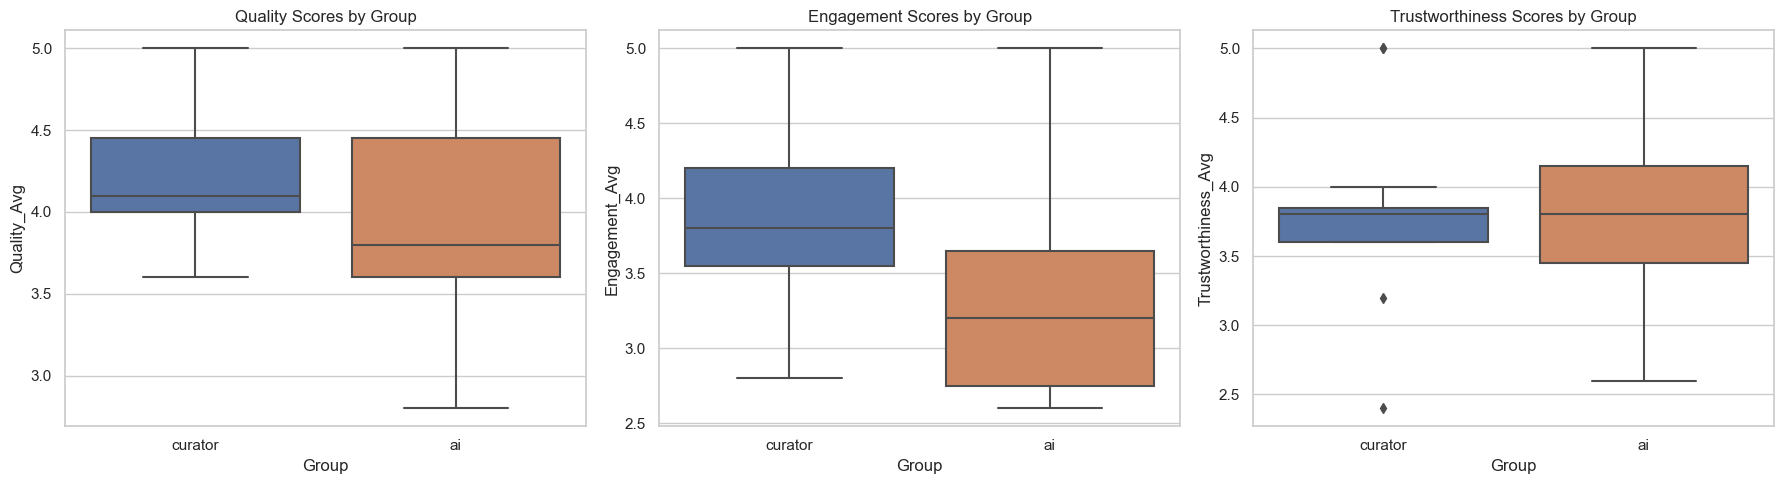

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Boxplots of average scores
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x="Group", y="Quality_Avg", data=post_clean, ax=axes[0])
axes[0].set_title("Quality Scores by Group")

sns.boxplot(x="Group", y="Engagement_Avg", data=post_clean, ax=axes[1])
axes[1].set_title("Engagement Scores by Group")

sns.boxplot(x="Group", y="Trustworthiness_Avg", data=post_clean, ax=axes[2])
axes[2].set_title("Trustworthiness Scores by Group")

plt.tight_layout()
plt.show()


/var/folders/fc/bs1m90qs483cvqy9ctgfm9sh0000gn/T/ipykernel_18202/437135167.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


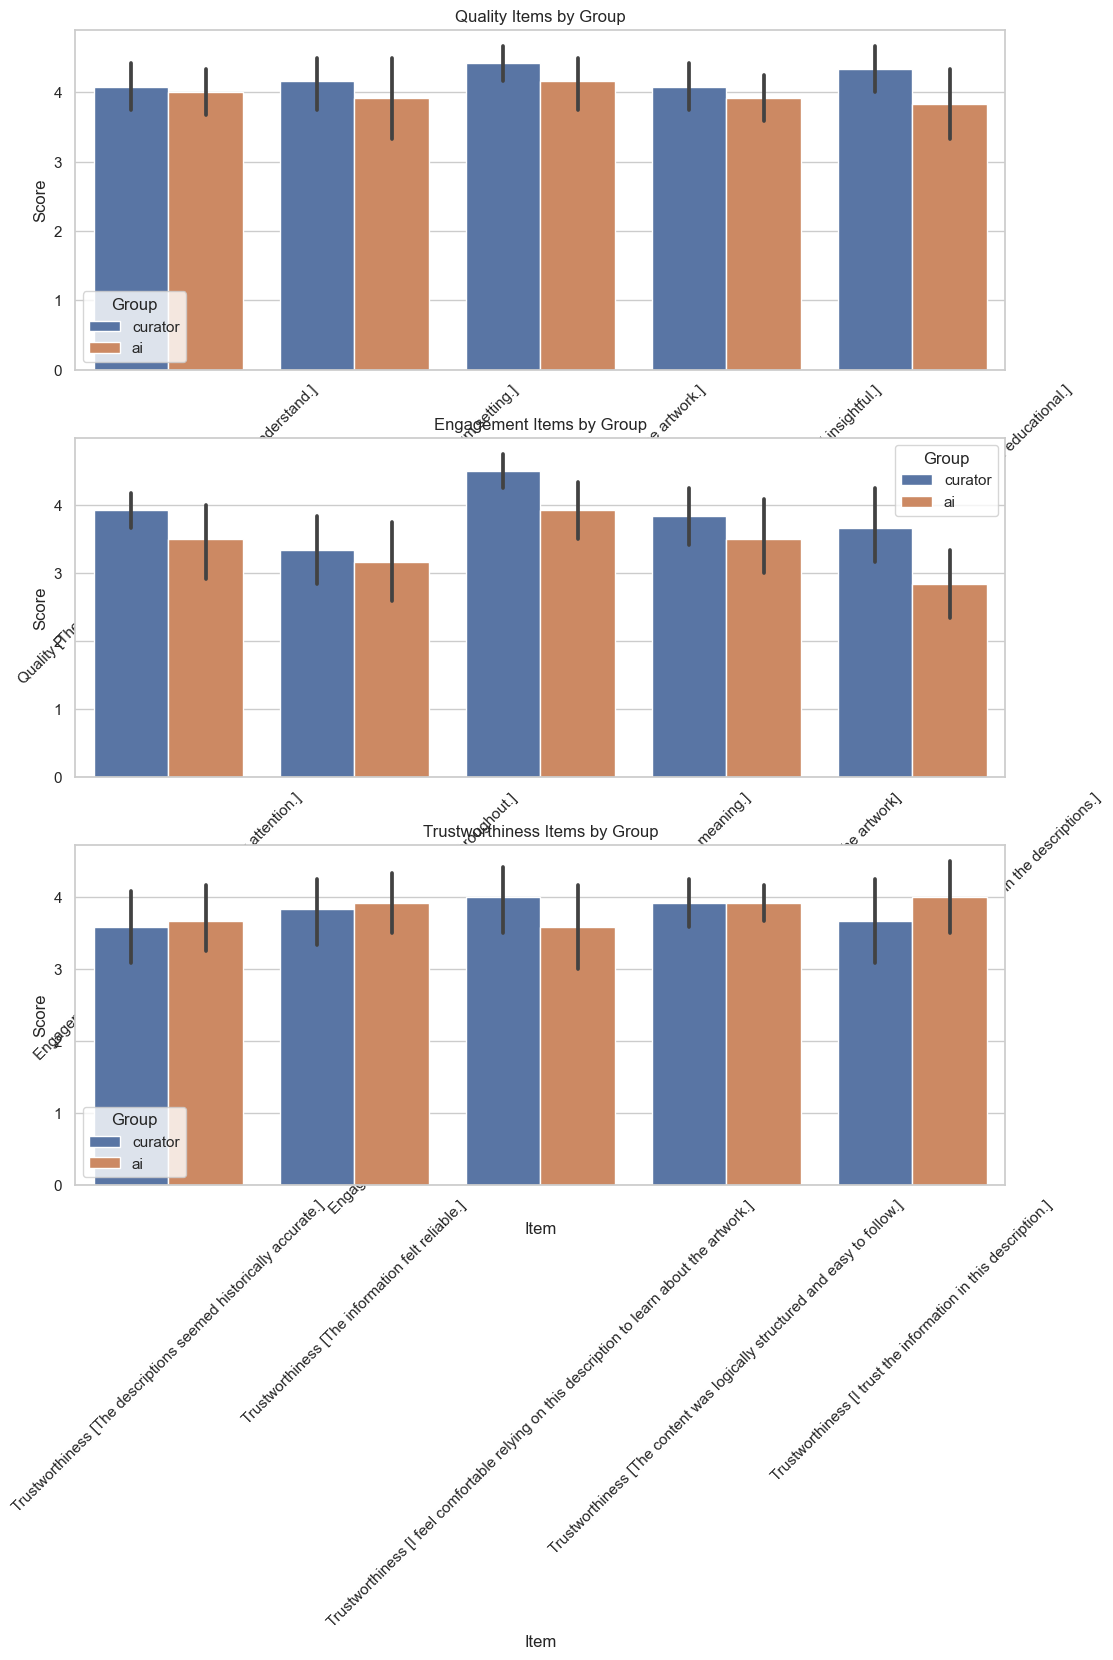

In [5]:
# Melt the dataset for item-level analysis
quality_melted = post_clean.melt(id_vars=["Group"], value_vars=quality_cols, var_name="Item", value_name="Score")
engagement_melted = post_clean.melt(id_vars=["Group"], value_vars=engagement_cols, var_name="Item", value_name="Score")
trust_melted = post_clean.melt(id_vars=["Group"], value_vars=trust_cols, var_name="Item", value_name="Score")

# Plot per-item average scores by group
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

sns.barplot(data=quality_melted, x="Item", y="Score", hue="Group", ax=axes[0])
axes[0].set_title("Quality Items by Group")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=engagement_melted, x="Item", y="Score", hue="Group", ax=axes[1])
axes[1].set_title("Engagement Items by Group")
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(data=trust_melted, x="Item", y="Score", hue="Group", ax=axes[2])
axes[2].set_title("Trustworthiness Items by Group")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
